In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import time 
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import *
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical,image_dataset_from_directory

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix,roc_auc_score,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
training_path = r'C:\Users\Chaitanya\Documents\ML\project\Brain-tumor-MRI\Training'
testing_path = r'C:\Users\Chaitanya\Documents\ML\project\Brain-tumor-MRI\Testing'

In [3]:
training_data = tf.keras.utils.image_dataset_from_directory(
    training_path,
    validation_split = 0.2,
    seed = 48,
    subset='training',
    batch_size = 32,
    image_size=(256, 256),
    shuffle=True,
    label_mode='categorical',
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [4]:
validation_data = tf.keras.utils.image_dataset_from_directory(
    training_path,
    validation_split = 0.2,
    seed = 48,
    batch_size = 32,
    image_size=(256, 256),
    shuffle=True,
    subset='validation',
    label_mode='categorical',
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [5]:
testing_data = tf.keras.utils.image_dataset_from_directory(
    testing_path,
    seed = 48,
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True,
    label_mode = "categorical",
)

Found 1311 files belonging to 4 classes.


In [6]:
testing_data.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

### ResNet50

In [7]:
resnet_model = ResNet50(weights='imagenet', input_shape=(256,256,3), include_top=False)
# Set all layers to non-trainable
for layer in resnet_model.layers[:171]:
    layer.trainable = False

for layer in resnet_model.layers[171:]:
    layer.trainable = True

In [8]:
model = Sequential()
model.add(Input(shape=(256,256,3)))
model.add(resnet_model)
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax')) # num labels = 4

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dropout (Dropout)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 40,365,572
Trainable params: 17,832,580
No

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [32]:
history=model.fit(training_data, 
          epochs=15,
          validation_data=validation_data
         )

Epoch 1/15
143/143 [==============================] - 31s 196ms/step - loss: 0.5918 - accuracy: 0.8514 - precision_1: 0.8595 - recall_1: 0.8475 - val_loss: 0.1785 - val_accuracy: 0.9396 - val_precision_1: 0.9436 - val_recall_1: 0.9370
Epoch 2/15
143/143 [==============================] - 27s 187ms/step - loss: 0.1234 - accuracy: 0.9551 - precision_1: 0.9580 - recall_1: 0.9532 - val_loss: 0.1156 - val_accuracy: 0.9571 - val_precision_1: 0.9587 - val_recall_1: 0.9562
Epoch 3/15
143/143 [==============================] - 27s 187ms/step - loss: 0.0640 - accuracy: 0.9757 - precision_1: 0.9759 - recall_1: 0.9744 - val_loss: 0.1169 - val_accuracy: 0.9571 - val_precision_1: 0.9570 - val_recall_1: 0.9545
Epoch 4/15
143/143 [==============================] - 27s 188ms/step - loss: 0.0445 - accuracy: 0.9840 - precision_1: 0.9849 - recall_1: 0.9836 - val_loss: 0.1123 - val_accuracy: 0.9553 - val_precision_1: 0.9562 - val_recall_1: 0.9553
Epoch 5/15
143/143 [==============================] - 27s 19

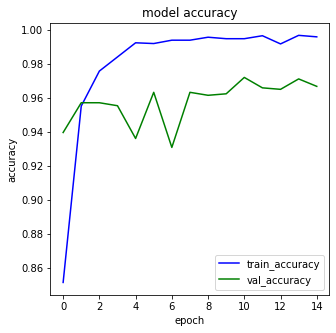

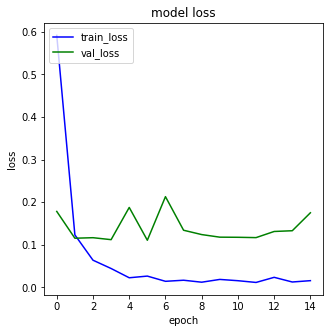

In [33]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist=history.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist['loss'],color="b",label="train_loss")
plt.plot(hist['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [34]:
model.evaluate(training_data)

143/143 [==============================] - 21s 143ms/step - loss: 0.0044 - accuracy: 0.9989 - precision_1: 0.9989 - recall_1: 0.9989


[0.004363157320767641,
 0.9989058971405029,
 0.9989058971405029,
 0.9989058971405029]

In [35]:
model.evaluate(validation_data)

36/36 [==============================] - 5s 140ms/step - loss: 0.1753 - accuracy: 0.9667 - precision_1: 0.9667 - recall_1: 0.9667


[0.17534320056438446,
 0.9667250514030457,
 0.9667250514030457,
 0.9667250514030457]

In [36]:
model.evaluate(testing_data)

41/41 [==============================] - 6s 144ms/step - loss: 0.2164 - accuracy: 0.9603 - precision_1: 0.9603 - recall_1: 0.9603


[0.21636457741260529,
 0.9603356122970581,
 0.9603356122970581,
 0.9603356122970581]

In [23]:
ResNet_results = {"Training":[0.995,0.995,0.995],
            "Validation":[0.966,0.966,0.966],
            "Testing":[0.960,0.960,0.960]}
Resnet_model = pd.DataFrame(ResNet_results,index= pd.Index(["Accuracy","Precision","Recall"]))

In [24]:
Resnet_model

,Training,Validation,Testing
Accuracy,0.995,0.966,0.96
Precision,0.995,0.966,0.96
Recall,0.995,0.966,0.96


### InceptionV3

In [37]:
inception = tf.keras.applications.InceptionV3(weights = "imagenet", input_shape = (256,256,3),include_top=False)
for layer in inception.layers:
    layer.trainable = False

model2 = Sequential()
model2.add(Input(shape=(256,256,3)))
model2.add(inception)
model2.add(Flatten())
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(4, activation='softmax')) 

model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dropout_4 (Dropout)         (None, 73728)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               9437312   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 31,240,612
Trainable params: 9,437,828
N

In [38]:
model2.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

             

In [39]:
history2 = model2.fit(training_data, 
          epochs=15,
          validation_data=validation_data
         )

Epoch 1/15
143/143 [==============================] - 28s 163ms/step - loss: 2.7698 - accuracy: 0.5851 - precision_2: 0.6652 - recall_2: 0.4652 - val_loss: 0.6892 - val_accuracy: 0.6900 - val_precision_2: 0.7885 - val_recall_2: 0.5779
Epoch 2/15
143/143 [==============================] - 20s 143ms/step - loss: 0.7854 - accuracy: 0.6801 - precision_2: 0.7898 - recall_2: 0.5796 - val_loss: 0.6147 - val_accuracy: 0.7128 - val_precision_2: 0.8117 - val_recall_2: 0.6191
Epoch 3/15
143/143 [==============================] - 20s 141ms/step - loss: 0.6484 - accuracy: 0.7341 - precision_2: 0.8269 - recall_2: 0.6556 - val_loss: 0.4896 - val_accuracy: 0.8240 - val_precision_2: 0.8651 - val_recall_2: 0.7863
Epoch 4/15
143/143 [==============================] - 21s 144ms/step - loss: 0.5335 - accuracy: 0.7845 - precision_2: 0.8489 - recall_2: 0.7265 - val_loss: 0.4090 - val_accuracy: 0.8520 - val_precision_2: 0.8912 - val_recall_2: 0.8179
Epoch 5/15
143/143 [==============================] - 20s 14

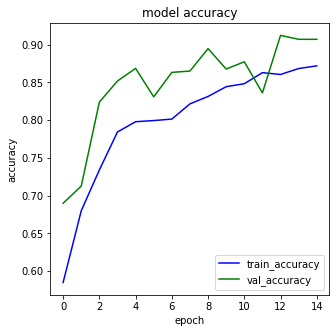

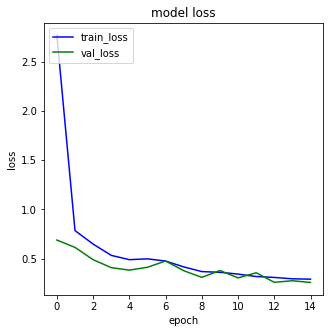

In [40]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist2=history2.history
plt.plot(hist2["accuracy"],color="b",label="train_accuracy")
plt.plot(hist2["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist2['loss'],color="b",label="train_loss")
plt.plot(hist2['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [41]:
model2.evaluate(training_data)

143/143 [==============================] - 16s 110ms/step - loss: 0.1175 - accuracy: 0.9683 - precision_2: 0.9797 - recall_2: 0.9600


[0.1175323948264122,
 0.9682713150978088,
 0.9796784520149231,
 0.9599562287330627]

In [42]:
model2.evaluate(validation_data)

36/36 [==============================] - 4s 107ms/step - loss: 0.2583 - accuracy: 0.9072 - precision_2: 0.9250 - recall_2: 0.8958


[0.2583107352256775,
 0.9071803689002991,
 0.9249547719955444,
 0.8957968354225159]

In [43]:
model2.evaluate(testing_data)

41/41 [==============================] - 6s 136ms/step - loss: 0.2468 - accuracy: 0.9077 - precision_2: 0.9251 - recall_2: 0.8947


[0.24682731926441193,
 0.9077040553092957,
 0.9250788688659668,
 0.8947368264198303]

In [25]:
inception_results = {"Training":[0.872,0.919,0.842],
            "Validation":[0.907,0.925,0.895],
            "Testing":[0.907,0.925,0.894]}
inception_model = pd.DataFrame(inception_results,index= pd.Index(["Accuracy","Precision","Recall"]))

In [26]:
inception_model

,Training,Validation,Testing
Accuracy,0.872,0.907,0.907
Precision,0.919,0.925,0.925
Recall,0.842,0.895,0.894


### vgg16

In [25]:
training_data1 = tf.keras.utils.image_dataset_from_directory(
    training_path,
    validation_split = 0.2,
    seed = 48,
    subset='training',
    batch_size = 8,
    image_size=(256, 256),
    shuffle=True,
    label_mode='categorical',
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [26]:
validation_data1 = tf.keras.utils.image_dataset_from_directory(
    training_path,
    validation_split = 0.2,
    seed = 48,
    batch_size = 8,
    image_size=(256, 256),
    shuffle=True,
    subset='validation',
    label_mode='categorical',
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [27]:
testing_data1 = tf.keras.utils.image_dataset_from_directory(
    testing_path,
    seed = 48,
    batch_size = 8,
    image_size = (256, 256),
    shuffle = True,
    label_mode = "categorical",
)

Found 1311 files belonging to 4 classes.


In [47]:
vgg16 = tf.keras.applications.VGG16(weights = "imagenet",input_shape = (256,256,3),include_top = False)
for layer in vgg16.layers:
    layer.trainable = False

model3 = Sequential()
model3.add(Input(shape=(256,256,3)))
model3.add(vgg16)
model3.add(Flatten())
model3.add(Dropout(0.25))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(4, activation='softmax')) 

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_6 (Dropout)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 18,909,636
Trainable params: 4,194,948
N

In [48]:
model3.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
             

In [49]:
history3 = model3.fit(training_data1, 
          epochs=15,
          validation_data=validation_data1  
         )

Epoch 1/15
572/572 [==============================] - 59s 100ms/step - loss: 1.4180 - accuracy: 0.8079 - precision_3: 0.8154 - recall_3: 0.8050 - val_loss: 0.3060 - val_accuracy: 0.8905 - val_precision_3: 0.8973 - val_recall_3: 0.8870
Epoch 2/15
572/572 [==============================] - 55s 97ms/step - loss: 0.3237 - accuracy: 0.9000 - precision_3: 0.9060 - recall_3: 0.8947 - val_loss: 0.2437 - val_accuracy: 0.9221 - val_precision_3: 0.9274 - val_recall_3: 0.9177
Epoch 3/15
572/572 [==============================] - 56s 98ms/step - loss: 0.1876 - accuracy: 0.9348 - precision_3: 0.9378 - recall_3: 0.9311 - val_loss: 0.2978 - val_accuracy: 0.9133 - val_precision_3: 0.9156 - val_recall_3: 0.9116
Epoch 4/15
572/572 [==============================] - 56s 98ms/step - loss: 0.1456 - accuracy: 0.9514 - precision_3: 0.9524 - recall_3: 0.9492 - val_loss: 0.1719 - val_accuracy: 0.9562 - val_precision_3: 0.9562 - val_recall_3: 0.9553
Epoch 5/15
572/572 [==============================] - 56s 98ms/

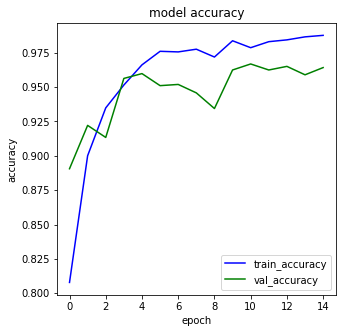

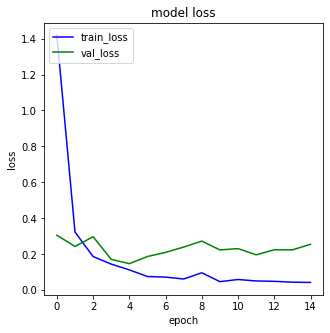

In [50]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist3=history3.history
plt.plot(hist3["accuracy"],color="b",label="train_accuracy")
plt.plot(hist3["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist3['loss'],color="b",label="train_loss")
plt.plot(hist3['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [51]:
model3.evaluate(validation_data1)

143/143 [==============================] - 18s 126ms/step - loss: 0.2554 - accuracy: 0.9641 - precision_3: 0.9641 - recall_3: 0.9641


[0.2553768455982208,
 0.9640980958938599,
 0.9640980958938599,
 0.9640980958938599]

In [54]:
model3.evaluate(testing_data1)

164/164 [==============================] - 71s 431ms/step - loss: 0.2493 - accuracy: 0.9527 - precision_3: 0.9527 - recall_3: 0.9527


[0.2492668628692627, 0.952707827091217, 0.952707827091217, 0.952707827091217]

In [21]:

vgg_results = {"Training":[0.987,0.988,0.987],
            "Validation":[0.964,0.964,0.964],
            "Testing":[0.952,0.952,0.952]}
vgg_model = pd.DataFrame(vgg_results,index= pd.Index(["Accuracy","Precision","Recall"]))

In [22]:
vgg_model

,Training,Validation,Testing
Accuracy,0.987,0.964,0.952
Precision,0.988,0.964,0.952
Recall,0.987,0.964,0.952


#### Xception

In [13]:
base_model = tf.keras.applications.Xception(
    include_top=False, 
    weights = 'imagenet',
    input_shape = (256, 256, 3) )

    

In [14]:
base_model.trainable = False

In [15]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    tf.keras.layers.RandomContrast(factor = 0.1)]
)

In [16]:
prediction_layer = tf.keras.layers.Dense(4, activation = "softmax")

In [17]:
inputs = tf.keras.Input((256, 256, 3))
x = data_augmentation(inputs)

x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training = False)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)

In [20]:
model_xcep = tf.keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model_xcep.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0   

In [22]:
model_xcep.compile(
  loss=tf.keras.losses.CategoricalCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
  )


In [28]:
history4 = model_xcep.fit(training_data1, 
          epochs=15,
          validation_data=validation_data1  
         )

Epoch 1/15
572/572 [==============================] - 98s 170ms/step - loss: 0.6381 - accuracy: 0.7641 - precision_1: 0.8279 - recall_1: 0.6886 - val_loss: 0.3737 - val_accuracy: 0.8555 - val_precision_1: 0.8791 - val_recall_1: 0.8214
Epoch 2/15
572/572 [==============================] - 97s 170ms/step - loss: 0.4933 - accuracy: 0.8298 - precision_1: 0.8663 - recall_1: 0.7713 - val_loss: 0.3088 - val_accuracy: 0.8949 - val_precision_1: 0.9133 - val_recall_1: 0.8581
Epoch 3/15
572/572 [==============================] - 146s 255ms/step - loss: 0.4611 - accuracy: 0.8420 - precision_1: 0.8770 - recall_1: 0.7928 - val_loss: 0.3073 - val_accuracy: 0.8923 - val_precision_1: 0.9106 - val_recall_1: 0.8739
Epoch 4/15
572/572 [==============================] - 257s 449ms/step - loss: 0.4262 - accuracy: 0.8479 - precision_1: 0.8846 - recall_1: 0.8120 - val_loss: 0.3331 - val_accuracy: 0.8800 - val_precision_1: 0.9042 - val_recall_1: 0.8599
Epoch 5/15
572/572 [==============================] - 276s

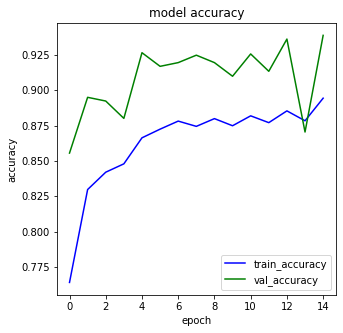

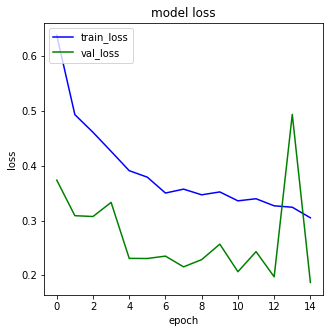

In [ ]:
plt.figure(figsize=(5,5))
# summarize history for accuracy
hist4=history4.history
plt.plot(hist4["accuracy"],color="b",label="train_accuracy")
plt.plot(hist4["val_accuracy"],color="g",label="val_accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5,5))
# summarize history for loss
plt.plot(hist4['loss'],color="b",label="train_loss")
plt.plot(hist4['val_loss'],color="g",label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [31]:
model_xcep.evaluate(testing_data1)

164/164 [==============================] - 10s 60ms/step - loss: 0.2150 - accuracy: 0.9191 - precision_1: 0.9277 - recall_1: 0.9108


[0.21499419212341309,
 0.9191457033157349,
 0.9277389049530029,
 0.9107551574707031]

In [19]:

Xception_results = {"Training":[0.894,0.910,0.877],
            "Validation":[0.938,0.944,0.930],
            "Testing":[0.919,0.927,0.910]}
Xception_model = pd.DataFrame(Xception_results,index= pd.Index(["Accuracy","Precision","Recall"]))

In [20]:
Xception_model

,Training,Validation,Testing
Accuracy,0.894,0.938,0.919
Precision,0.910,0.944,0.927
Recall,0.877,0.930,0.910
